# 💰 Value at Risk (VaR) Calculator

This project calculates Value at Risk using:
- Historical Method
- Parametric (Variance-Covariance) Method

📊 Tools: Python, NumPy, Pandas, Matplotlib


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Generate fake daily returns for 1 year (252 trading days)
np.random.seed(42)
returns = np.random.normal(0.001, 0.02, 252)  # mean return = 0.1%, std dev = 2%
returns = pd.Series(returns)
returns.head()


0    0.010934
1   -0.001765
2    0.013954
3    0.031461
4   -0.003683
dtype: float64

## 📉 Historical VaR Method

We sort historical returns and find the percentile corresponding to the confidence level.


In [17]:
# Set confidence level
confidence_level = 0.95

# Calculate historical VaR
var_95 = np.percentile(returns, (1 - confidence_level) * 100)
print(f"🔻 Historical VaR at 95% confidence: {round(var_95 * 100, 2)}%")


🔻 Historical VaR at 95% confidence: -2.89%


## 🧠 Parametric (Gaussian) VaR Method

This method assumes returns are normally distributed and uses mean and standard deviation.


In [18]:
mean_return = returns.mean()
std_dev = returns.std()

# Z-score for 95% confidence ≈ 1.65
z = 1.65

parametric_var = -(mean_return - z * std_dev)
print(f"🔻 Parametric VaR at 95% confidence: {round(parametric_var * 100, 2)}%")


🔻 Parametric VaR at 95% confidence: 3.1%


## 📊 Return Distribution and VaR


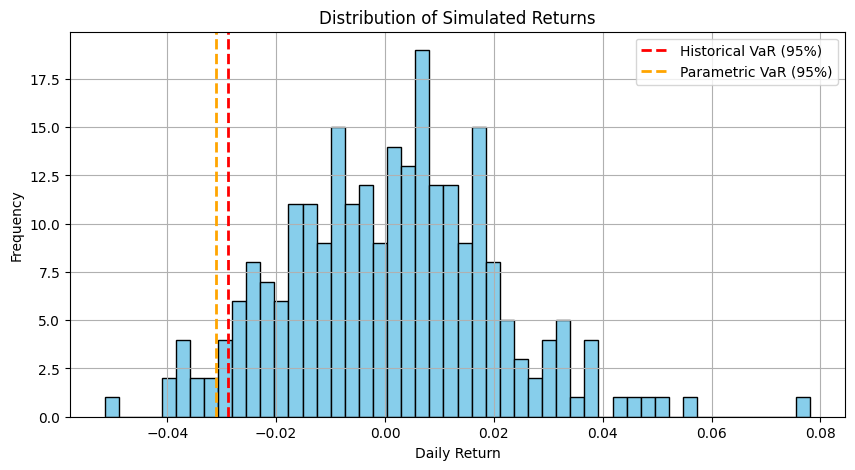

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50, color='skyblue', edgecolor='black')
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label='Historical VaR (95%)')
plt.axvline(-parametric_var, color='orange', linestyle='dashed', linewidth=2, label='Parametric VaR (95%)')
plt.title('Distribution of Simulated Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
